In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'SimHei'

## 查看数据

In [2]:
data = pd.read_csv('./杭州市二手房数据.csv')
data.head()

,Unnamed: 0,标题,总价格,单价,小区,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积,...,房屋用途,房屋年限,产权所属,抵押信息,房本备件,房源核验统一编码,用水类型,用电类型,燃气价格,别墅类型
0,0,['天街6号线地铁出行，自住精装跃层5房，南北通飞机户型'],1200.0,55196,倾城之恋,滨江,滨江区政府,5室2厅1厨3卫,高楼层 (共20层),217.41㎡,...,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,211209IR047951,NaN,NaN,NaN,NaN
1,1,['此房满五唯一 边套全明户型 配套齐全 精装修'],465.0,41224,东和云第,滨江,浦沿,3室2厅1厨2卫,中楼层 (共32层),112.8㎡,...,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,170911610036,NaN,NaN,NaN,NaN
2,2,['西边套，诚心出售，价格可谈，楼层适中'],307.0,33254,铁岭花园,滨江,西兴,3室2厅1厨1卫,中楼层 (共6层),92.32㎡,...,普通住宅,满两年,非共有,\n 无抵押\n ...,已上传房本照片,211027BI578455,NaN,NaN,NaN,NaN
3,3,['龙湖物业，中高好楼层，地铁1号线西兴站，满五年'],505.0,56243,中天官河锦庭,滨江,西兴,3室2厅1厨1卫,高楼层 (共34层),89.79㎡,...,普通住宅,满五年,共有,\n 有抵押 80万元\n ...,已上传房本照片,211124MZ862150,NaN,NaN,NaN,NaN
4,4,['纯毛坯 户型好 看房方便 有钥匙'],510.0,31893,临江花园,滨江,彩虹城,4室2厅1厨2卫,高楼层 (共20层),159.91㎡,...,普通住宅,满五年,非共有,\n 无抵押\n ...,已上传房本照片,211125LY937169,NaN,NaN,NaN,NaN


- house_address：房屋所属小区
- house_region: 房屋所属市辖区
- house_area： 房屋地址（街道）
- house_id ： 房屋售卖编号
- total_price：总价（万元）
- unit_price：单价（元/平方米）
- house_layout：房屋户型
- house_floor：所在楼层
- house_rental_area：建筑面积
- house_structure：户型结构
- house_inner_area：套内面积
- house_building_type：建筑类型
- house_orientation：房屋朝向
- house_building_structure：建筑结构
- house_decoration：装修情况
- house_elevator_sytle：梯户比例
- house_heating： 房屋供暖
- house_listing_time: 挂牌时间
- house_transaction_type: 交易权属
- house_last_time: 上次交易时间
- house_useage: 房屋用途
- house_years: 房屋年限
- house_property: 产权所属
- house_mortgage_info: 抵押信息
- house_book: 房本备件
- house_fx_id: 别墅类型
- house_longitude： 房屋所在经度
- house_latitude：房屋所在维度
- city：所在城市

In [3]:
data.shape

(39640, 31)

## 数据清洗

In [4]:
data.describe()

,Unnamed: 0,总价格,单价
count,39640.000000,39640.000000,39640.000000
mean,1222.299369,420.060941,37670.447755
std,863.520424,334.648862,17591.094360
min,0.000000,18.000000,4346.000000
25%,464.000000,235.000000,26115.250000
50%,1072.500000,333.000000,33539.000000
75%,1918.250000,495.000000,45323.250000
max,2999.000000,6000.000000,129791.000000


#### 重复行

In [5]:
# 查看是否有重复的行
True in data.duplicated().tolist()

True

In [6]:
# 删除重复行、保留最后个重复的
data.drop_duplicates(keep="last",inplace=True)
data.shape

(39638, 31)

#### 缺失值

In [7]:
# 查看每列是否有空值
data.isnull().any()

Unnamed: 0    False
标题            False
总价格           False
单价            False
小区            False
房屋所属市辖区       False
房屋地址（街道）      False
房屋户型           True
所在楼层          False
建筑面积          False
户型结构           True
套内面积           True
建筑类型           True
房屋朝向          False
建筑结构           True
装修情况           True
梯户比例           True
配备电梯           True
挂牌时间           True
交易权属           True
上次交易          False
房屋用途          False
房屋年限          False
产权所属          False
抵押信息           True
房本备件           True
房源核验统一编码       True
用水类型           True
用电类型           True
燃气价格           True
别墅类型           True
dtype: bool

In [8]:
data.drop(columns=['用水类型','用电类型','燃气价格','别墅类型'],inplace=True)
data.head()

,Unnamed: 0,标题,总价格,单价,小区,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积,...,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,房源核验统一编码
0,0,['天街6号线地铁出行，自住精装跃层5房，南北通飞机户型'],1200.0,55196,倾城之恋,滨江,滨江区政府,5室2厅1厨3卫,高楼层 (共20层),217.41㎡,...,有,2021-12-09,商品房,2008-10-05,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,211209IR047951
1,1,['此房满五唯一 边套全明户型 配套齐全 精装修'],465.0,41224,东和云第,滨江,浦沿,3室2厅1厨2卫,中楼层 (共32层),112.8㎡,...,有,2021-12-09,商品房,2016-12-06,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,170911610036
2,2,['西边套，诚心出售，价格可谈，楼层适中'],307.0,33254,铁岭花园,滨江,西兴,3室2厅1厨1卫,中楼层 (共6层),92.32㎡,...,无,2021-11-22,商品房,2017-08-03,普通住宅,满两年,非共有,\n 无抵押\n ...,已上传房本照片,211027BI578455
3,3,['龙湖物业，中高好楼层，地铁1号线西兴站，满五年'],505.0,56243,中天官河锦庭,滨江,西兴,3室2厅1厨1卫,高楼层 (共34层),89.79㎡,...,有,2021-11-24,商品房,2016-02-16,普通住宅,满五年,共有,\n 有抵押 80万元\n ...,已上传房本照片,211124MZ862150
4,4,['纯毛坯 户型好 看房方便 有钥匙'],510.0,31893,临江花园,滨江,彩虹城,4室2厅1厨2卫,高楼层 (共20层),159.91㎡,...,有,2021-11-25,商品房,2005-06-06,普通住宅,满五年,非共有,\n 无抵押\n ...,已上传房本照片,211125LY937169


In [9]:
data.isnull().sum()

Unnamed: 0       0
标题               0
总价格              0
单价               0
小区               0
房屋所属市辖区          0
房屋地址（街道）         0
房屋户型             2
所在楼层             0
建筑面积             0
户型结构          1378
套内面积             2
建筑类型          1378
房屋朝向             0
建筑结构            26
装修情况             2
梯户比例          1378
配备电梯          1378
挂牌时间          2424
交易权属          2424
上次交易             0
房屋用途             0
房屋年限             0
产权所属             0
抵押信息             6
房本备件             6
房源核验统一编码      1806
dtype: int64

In [10]:
# 删除含有空值的行
data_nulless = data.dropna(axis=0,how='any')
data_nulless.shape

(34070, 27)

In [11]:
# 查看行是否有空值
data_nulless.isnull().any()

Unnamed: 0    False
标题            False
总价格           False
单价            False
小区            False
房屋所属市辖区       False
房屋地址（街道）      False
房屋户型          False
所在楼层          False
建筑面积          False
户型结构          False
套内面积          False
建筑类型          False
房屋朝向          False
建筑结构          False
装修情况          False
梯户比例          False
配备电梯          False
挂牌时间          False
交易权属          False
上次交易          False
房屋用途          False
房屋年限          False
产权所属          False
抵押信息          False
房本备件          False
房源核验统一编码      False
dtype: bool

In [12]:
def deleteSpecificRow(df,condition):
#     newData = df[~df1['A'].isin([])]
    newData = df[condition]
    return newData

data_nulless = deleteSpecificRow(data_nulless,~data_nulless['房屋年限'].isin(['暂无数据']))


In [13]:
data_nulless.head()

,Unnamed: 0,标题,总价格,单价,小区,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积,...,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,房源核验统一编码
0,0,['天街6号线地铁出行，自住精装跃层5房，南北通飞机户型'],1200.0,55196,倾城之恋,滨江,滨江区政府,5室2厅1厨3卫,高楼层 (共20层),217.41㎡,...,有,2021-12-09,商品房,2008-10-05,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,211209IR047951
1,1,['此房满五唯一 边套全明户型 配套齐全 精装修'],465.0,41224,东和云第,滨江,浦沿,3室2厅1厨2卫,中楼层 (共32层),112.8㎡,...,有,2021-12-09,商品房,2016-12-06,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,170911610036
2,2,['西边套，诚心出售，价格可谈，楼层适中'],307.0,33254,铁岭花园,滨江,西兴,3室2厅1厨1卫,中楼层 (共6层),92.32㎡,...,无,2021-11-22,商品房,2017-08-03,普通住宅,满两年,非共有,\n 无抵押\n ...,已上传房本照片,211027BI578455
3,3,['龙湖物业，中高好楼层，地铁1号线西兴站，满五年'],505.0,56243,中天官河锦庭,滨江,西兴,3室2厅1厨1卫,高楼层 (共34层),89.79㎡,...,有,2021-11-24,商品房,2016-02-16,普通住宅,满五年,共有,\n 有抵押 80万元\n ...,已上传房本照片,211124MZ862150
4,4,['纯毛坯 户型好 看房方便 有钥匙'],510.0,31893,临江花园,滨江,彩虹城,4室2厅1厨2卫,高楼层 (共20层),159.91㎡,...,有,2021-11-25,商品房,2005-06-06,普通住宅,满五年,非共有,\n 无抵押\n ...,已上传房本照片,211125LY937169


#### 异常值

In [14]:
for i in data_nulless.columns:
    print(data_nulless[i].unique())

[   0    1    2 ... 1443 1517 2390]
["['天街6号线地铁出行，自住精装跃层5房，南北通飞机户型']" "['此房满五唯一 边套全明户型  配套齐全 精装修']"
 "['西边套，诚心出售，价格可谈，楼层适中']" ... "['豪波西溪润景，距阿里1500米，背靠西溪湿地。']"
 "['未来科技城板块，满五唯一，地铁口，房东诚心出售']" "['双面沿河住繁华里采光视野好，诚心出售精装修，带地暖']"]
[1200.   465.   307.  ... 1899.  1360.   352.8]
[55196 41224 33254 ... 57111 49842 57580]
['倾城之恋' '东和云第' '铁岭花园' ... '泰禾杭州院子' '安乐新村' '竹海雅苑']
['滨江' '临平区' '余杭' '富阳' '拱墅' '西湖' '钱塘区' '上城' '桐庐' '萧山']
['滨江区政府' '浦沿' '西兴' '彩虹城' '奥体' '白马湖' '长河' '崇贤' '翡翠城' '富春' '银湖科技城' '东洲' '富阳'
 '鹿山新城' '江南新城' '三墩' '建国北路' '大关' '朝晖' '桥西' '三塘' '和平' '半山' '流水苑' '石桥' '申花'
 '湖墅' '信义坊' '拱宸桥' '体育场路' '和睦' '潮鸣' '德胜' '众安桥' '万达广场' '长庆' '丝绸城' '天水' '德胜东'
 '三里亭' '武林' '笕桥' '勾庄' '良渚' '东湖' '临平新城' '星桥' '塘栖' '乔司' '临平运河' '留下' '瓶窑'
 '金沙湖' '沿江南' '高教园区东' '高教园区西' '工业园南' '大江东' '工业园北' '沿江北' '仁和' '丁桥' '火车东站'
 '九堡' '钱江新城' '城东新城' '景芳' '闸弄口' '复兴' '七堡' '湖滨' '南肖埠' '近江' '南星' '清波' '采荷'
 '四季青' '清泰' '华家池' '鼓楼' '城站' '雄镇楼' '望江' '桐庐' '未来科技城' '闲林' '小和山' '萧山市区'
 '萧山新城区' '义桥' '南部卧城' '萧山开发区' '闻堰' '湘湖' '萧山科技城' '钱江世纪城' '临浦' '瓜沥' '西湖景区'
 '

#### 数据类型转换

In [15]:
import re

In [16]:
# 将建筑面积的㎡去掉
def transStrToNum(line):
    # 所在楼层去掉层数，保留低、中、高类型
    line['所在楼层'] = line['所在楼层'][0:3]

    area = str(line['建筑面积'])
    index = area.find('㎡')
    if index!=-1:
        num = float(area[:index])
    else:
        num = float(area)
#     num = re.search(r'(.*?)㎡',line['建筑面积'],re.I).group(1)
    line['建筑面积'] = num;
    return line
    
data_nulless = data_nulless.apply(transStrToNum,axis=1)
data_nulless.shape
data_nulless.head()

,Unnamed: 0,标题,总价格,单价,小区,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积,...,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,房源核验统一编码
0,0,['天街6号线地铁出行，自住精装跃层5房，南北通飞机户型'],1200.0,55196,倾城之恋,滨江,滨江区政府,5室2厅1厨3卫,高楼层,217.41,...,有,2021-12-09,商品房,2008-10-05,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,211209IR047951
1,1,['此房满五唯一 边套全明户型 配套齐全 精装修'],465.0,41224,东和云第,滨江,浦沿,3室2厅1厨2卫,中楼层,112.80,...,有,2021-12-09,商品房,2016-12-06,普通住宅,满五年,共有,\n 无抵押\n ...,已上传房本照片,170911610036
2,2,['西边套，诚心出售，价格可谈，楼层适中'],307.0,33254,铁岭花园,滨江,西兴,3室2厅1厨1卫,中楼层,92.32,...,无,2021-11-22,商品房,2017-08-03,普通住宅,满两年,非共有,\n 无抵押\n ...,已上传房本照片,211027BI578455
3,3,['龙湖物业，中高好楼层，地铁1号线西兴站，满五年'],505.0,56243,中天官河锦庭,滨江,西兴,3室2厅1厨1卫,高楼层,89.79,...,有,2021-11-24,商品房,2016-02-16,普通住宅,满五年,共有,\n 有抵押 80万元\n ...,已上传房本照片,211124MZ862150
4,4,['纯毛坯 户型好 看房方便 有钥匙'],510.0,31893,临江花园,滨江,彩虹城,4室2厅1厨2卫,高楼层,159.91,...,有,2021-11-25,商品房,2005-06-06,普通住宅,满五年,非共有,\n 无抵押\n ...,已上传房本照片,211125LY937169


In [17]:
# data_nulless.drop(columns=['Unnamed: 0'],inplace=True)
data_nulless.columns


Index(['Unnamed: 0', '标题', '总价格', '单价', '小区', '房屋所属市辖区', '房屋地址（街道）', '房屋户型',
       '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例',
       '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件',
       '房源核验统一编码'],
      dtype='object')

## 探索式分析

In [18]:
lianjia_df = data_nulless

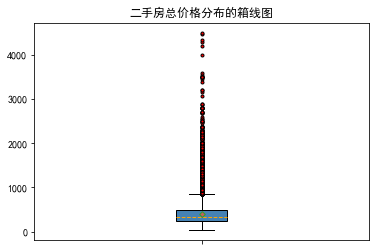

In [19]:
# # 读取数据
# Sec_Buildings = pd.read_excel('./datasets/sec_buildings.xlsx')
# 绘制箱线图，总价格
plt.boxplot(x = lianjia_df['总价格'], 
            patch_artist = True, 
            showmeans = True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'steelblue'}, # 设置箱体属性，如边框色和填充色
            # 设置异常点属性，如点的形状、填充色和点的大小
            flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':3}, 
            # 设置均值点的属性，如点的形状、填充色和点的大小
            meanprops = {'marker':'D','markerfacecolor':'indianred', 'markersize':4}, 
            # 设置中位数线的属性，如线的类型和颜色
            medianprops = {'linestyle':'--','color':'orange'}, 
           labels = [''] # 删除x轴的刻度标签，否则图形显示刻度标签为1
           )
# 添加图形标题
plt.title('二手房总价格分布的箱线图')
# 显示图形
plt.show()

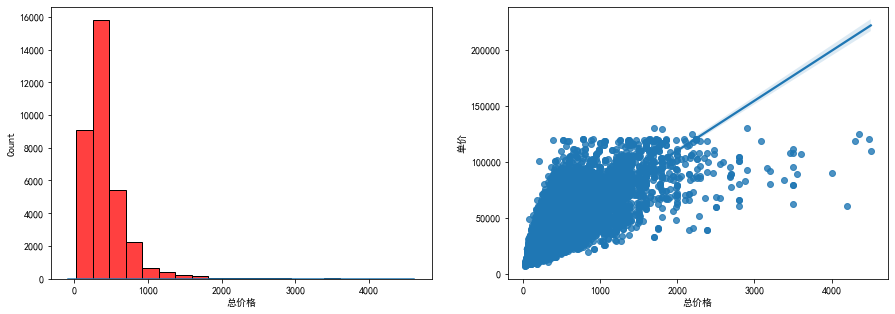

In [20]:
# 画两幅图
# lianjia_df['总价格']=np.array(lianjia_df['总价格'],dtype=np.float)

# lianjia_df['总价格']=pd.DataFrame(lianjia_df['总价格'])
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 建房时间的分布  kdeplot(核密度估计图)  
# 核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。
# 通过核密度估计图可以比较直观的看出数据样本本身的分布特征。
sns.histplot(lianjia_df['总价格'], bins=20, ax=ax1, color='r')
sns.kdeplot(lianjia_df['总价格'], shade=False, ax=ax1)
# 建房时间和出售价格的关系
sns.regplot(x='总价格', y='单价', data=lianjia_df, ax=ax2)
plt.show()

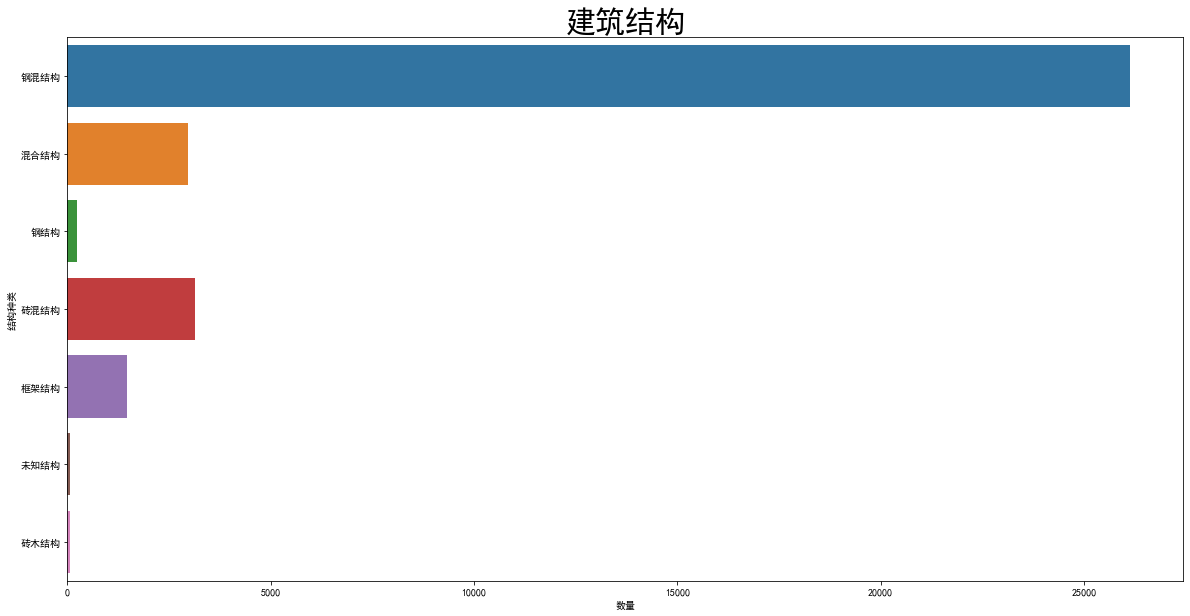

In [21]:
df = lianjia_df.copy()
f, ax1 = plt.subplots(figsize = (20, 10))
sns.countplot(y = '建筑结构', data = df, ax = ax1)
ax1.set_title('建筑结构',fontsize=30)
ax1.set_xlabel('数量')
ax1.set_ylabel('结构种类')
plt.show()

### 房屋朝向与价格

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


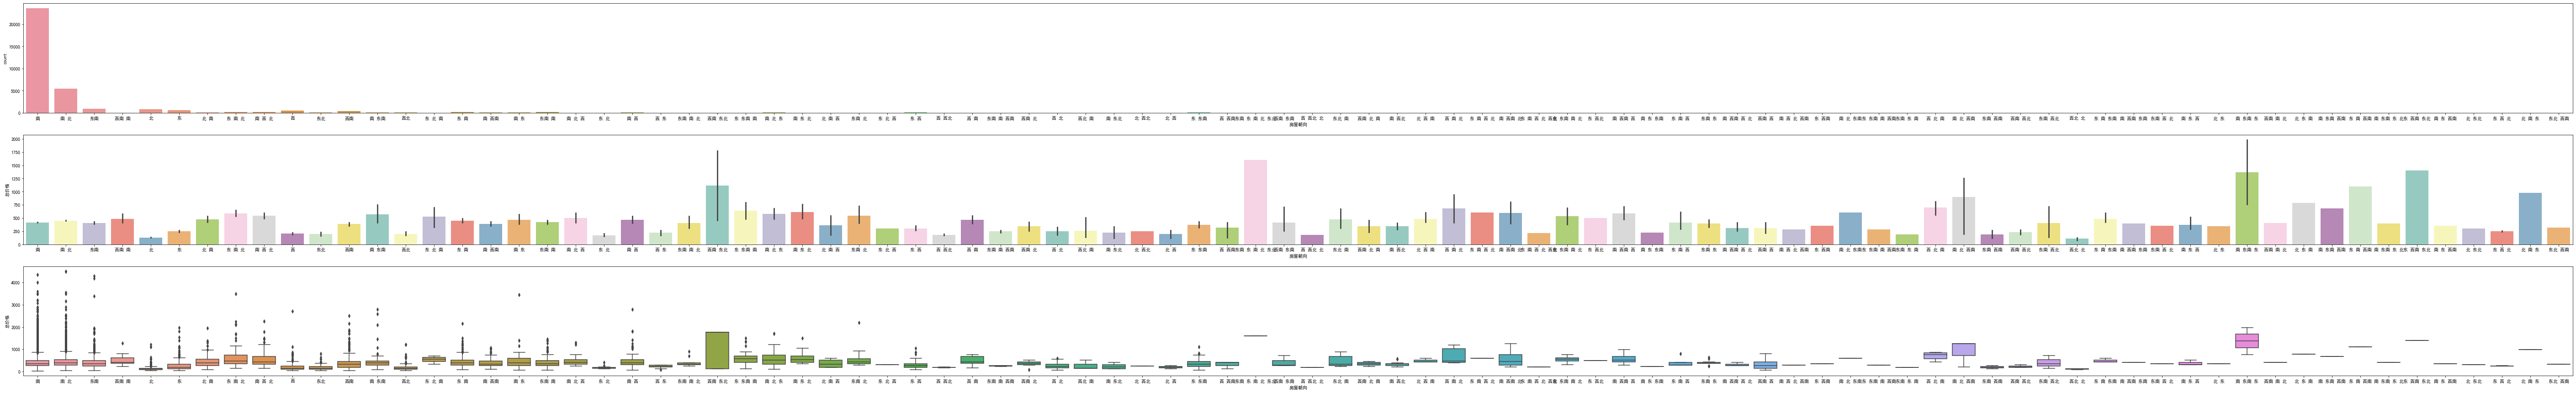

In [22]:
# 房屋朝向与价格
df['房屋朝向'].value_counts()
df = lianjia_df.copy()
# 去掉错误数据“南北”，去除 Renovation 中的异常值，
df['房屋朝向'] = df.loc[(df['房屋朝向'] != '南北'), '房屋朝向']
 
# 画出分类直方图
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize =(100, 15))
sns.countplot(df['房屋朝向'], ax = ax1)
sns.barplot(x = '房屋朝向', y = '总价格', data = df, palette = "Set3", ax = ax2)
sns.boxplot(x = '房屋朝向', y = '总价格', data = df, ax = ax3)
plt.show()

### 房价与装修分布

精装    23215
简装    10963
毛坯     5379
其他       51
Name: 装修情况, dtype: int64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='装修情况', ylabel='单价'>

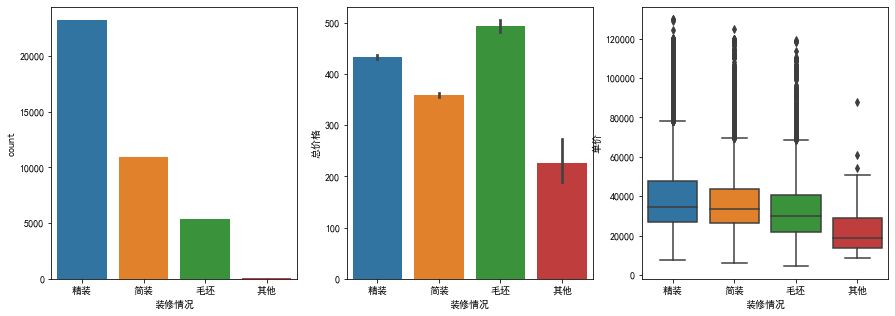

In [23]:
#房价与装修分布
import seaborn as sns
df = pd.read_csv('./杭州市二手房数据.csv')
# lianjia_df['装修情况'] =lianjia_df['装修情况'].replace('', '其他')  
# plt.show()
df = df[df['装修情况'].isin(['精装','简装','毛坯','其他'])]
df.head()
print(df['装修情况'].value_counts())
data_groupby_address = df.groupby(by=['装修情况'])
data_mean = data_groupby_address.mean()
data_mean.sort_values(by='单价',ascending=False,inplace=True)
data_mean
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(df['装修情况'], ax=ax1)
sns.barplot(x='装修情况', y='总价格', data=df, ax=ax2)
sns.boxplot(x='装修情况', y='单价', data=df, ax=ax3)

### 绘制房价区间统计

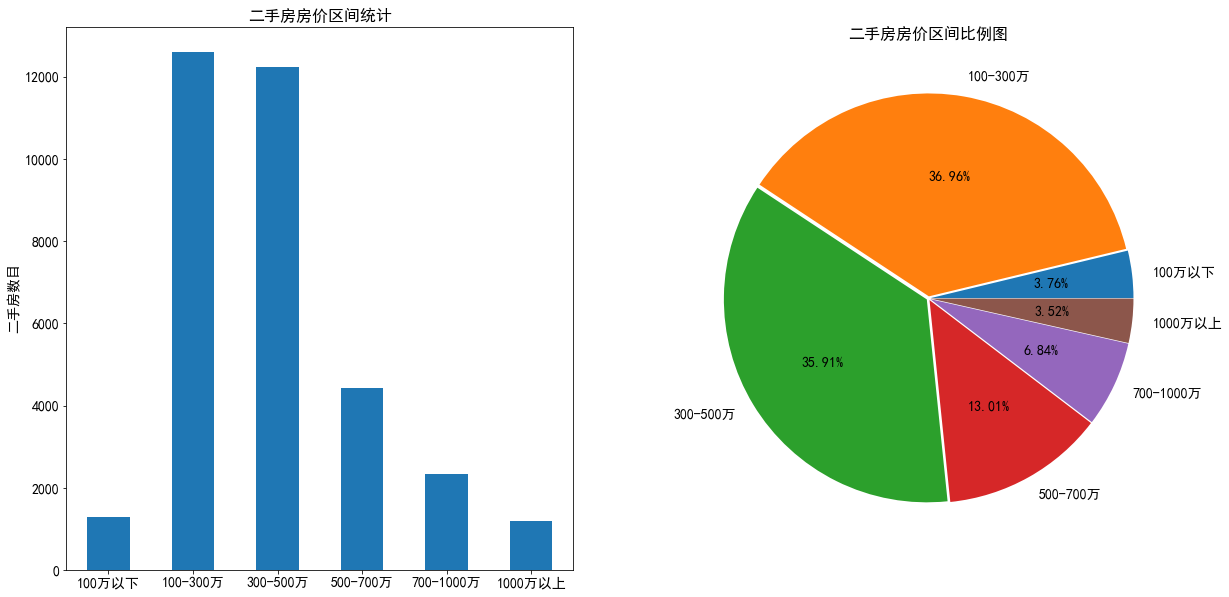

In [24]:
# 绘制房价区间统计图函数
def draw_prices_range (house_prices_data, bar_title, pie_title):
    price_range = [0, 100, 300, 500, 700, 1000, 1000000]
    price_range_labels = ['100万以下', '100-300万', '300-500万', '500-700万', '700-1000万', '1000万以上']

    price_list = pd.cut(house_prices_data['总价格'], bins=price_range, labels=price_range_labels, include_lowest=True)
    # print(price_list)
    prict_list_count = pd.value_counts(price_list, sort=False)

    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    prict_list_count.plot( kind='bar', fontsize=14, rot=0)
    plt.title(bar_title, fontsize=16)
    plt.ylabel('二手房数目', font={'size': 14})

    plt.subplot(1,2,2)
    explode = np.full(len(prict_list_count), 0.01)

    patches,l_text,p_text = plt.pie(prict_list_count.values, labels=price_range_labels,
            autopct='%1.2f%%', explode=explode)

    for t in p_text:
        t.set_size(14)

    for t in l_text:
        t.set_size(14)

    plt.title(pie_title, fontsize=16)
    plt.show()

draw_prices_range(data_nulless, '二手房房价区间统计', '二手房房价区间比例图')

### 不同楼层占二手房总数比例

低楼层    10268
高楼层    11429
中楼层    12369
Name: 所在楼层, dtype: int64


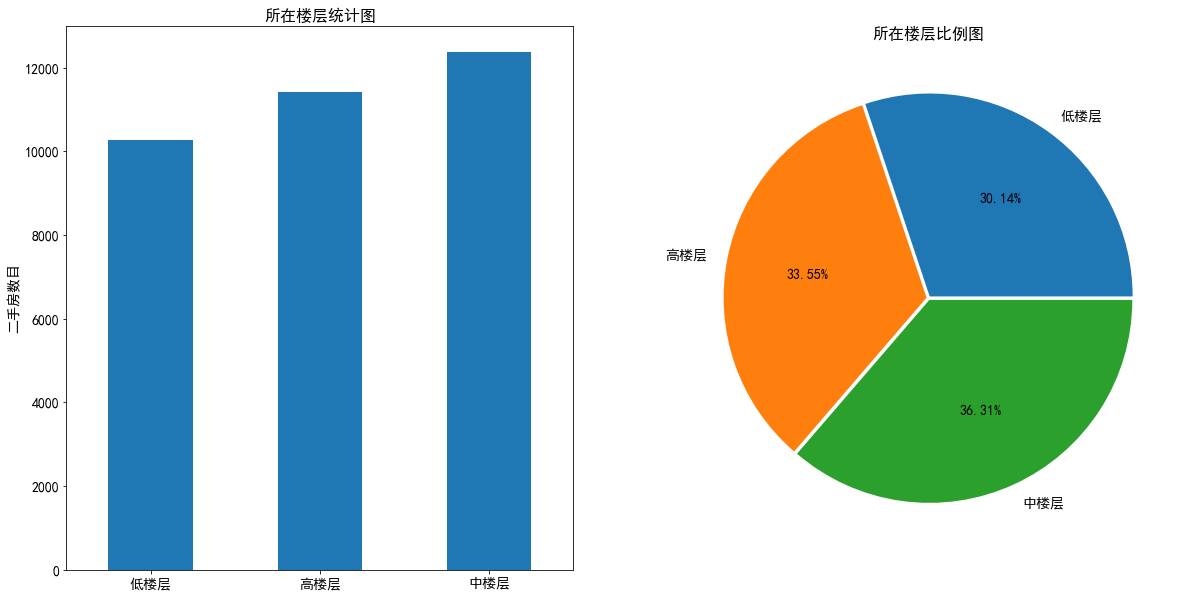

In [25]:
# 不同楼层占二手房总数比例图
floor_house_count = pd.value_counts(data_nulless['所在楼层'], sort=False)
print(floor_house_count)

floor_house_labels = list(floor_house_count.index)

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
floor_house_count.plot( kind='bar', fontsize=14, rot=0)
plt.title('所在楼层统计图', fontsize=16)
plt.ylabel('二手房数目', font={'size': 14})

plt.subplot(1,2,2)
explode = np.full(len(floor_house_count), 0.01)

patches,l_text,p_text = plt.pie(floor_house_count.values, labels=floor_house_labels,
        autopct='%1.2f%%', explode=explode)

for t in p_text:
    t.set_size(14)

for t in l_text:
    t.set_size(14)

plt.title('所在楼层比例图', fontsize=16)
plt.show()

### 房屋用途和二手房房价的关系

普通住宅    30508
商住两用     2981
商品房       576
平房          1
Name: 房屋用途, dtype: int64


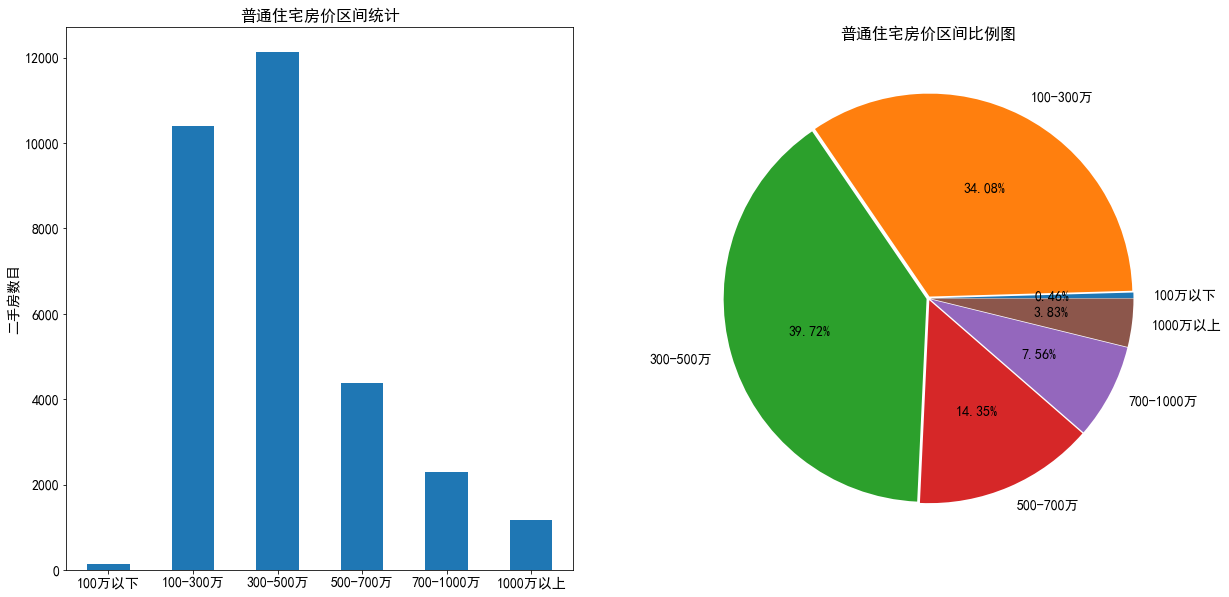

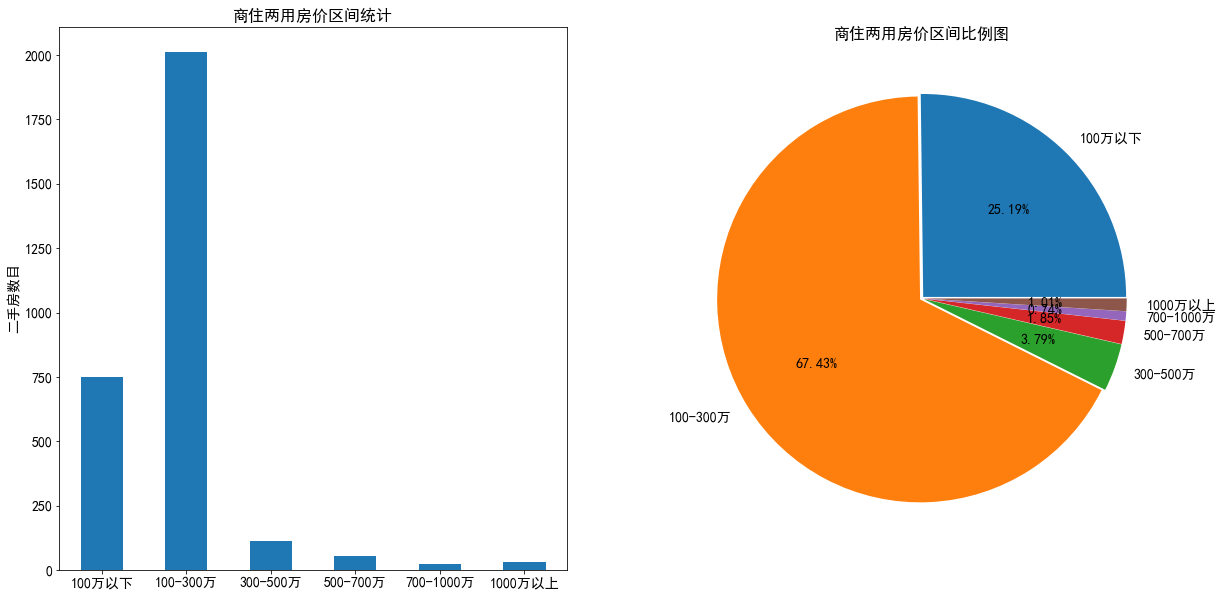

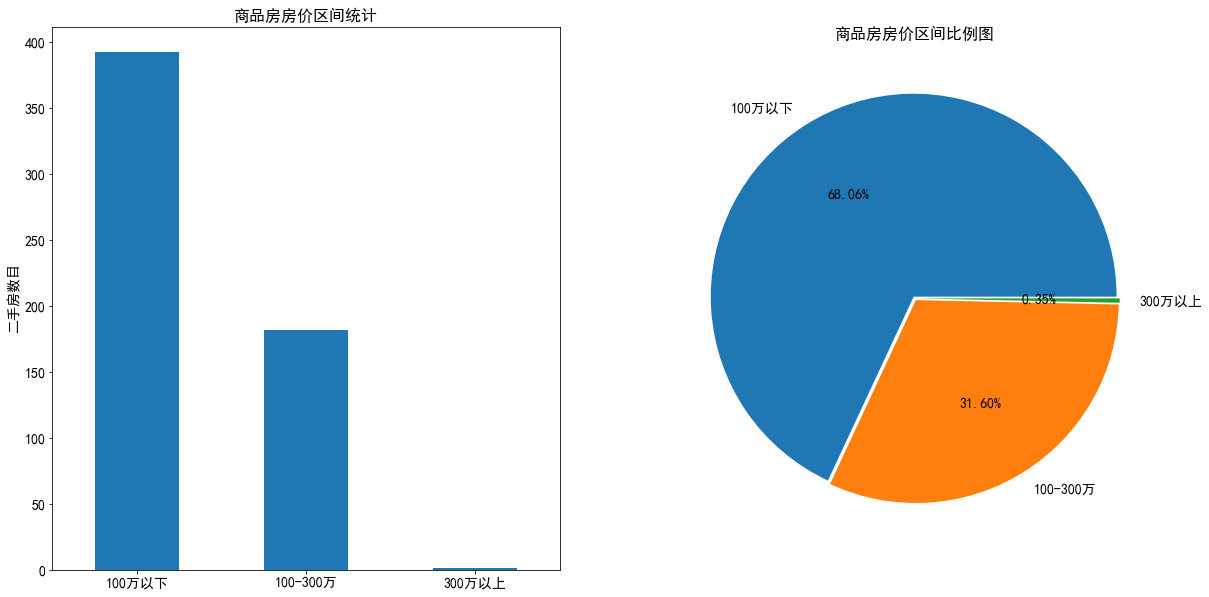

       Unnamed: 0                         标题    总价格     单价       小区 房屋所属市辖区  \
29571         202  ['此房楼层好，采光充足  业主急售 看房方便']  930.0  78217  旭辉和昌都会山      萧山   

      房屋地址（街道）      房屋户型 所在楼层   建筑面积  ... 配备电梯        挂牌时间 交易权属        上次交易  \
29571    钱江世纪城  4室1厅1厨2卫  高楼层  118.9  ...    有  2021-08-07  商品房  2020-05-25   

      房屋用途  房屋年限 产权所属                                               抵押信息  \
29571   平房  未满两年  非共有  \n                                无抵押\n       ...   

          房本备件        房源核验统一编码  
29571  已上传房本照片  200709ZL550892  

[1 rows x 27 columns]


In [26]:
# 房屋用途和二手房房价的关系图

# 查看房屋类型有哪些
function_class_count = pd.value_counts(data_nulless['房屋用途'])
print(function_class_count)

# 普通住宅的二手房房价
average_function_data = data_nulless[data_nulless['房屋用途'] == '普通住宅']
draw_prices_range(average_function_data, '普通住宅房价区间统计', '普通住宅房价区间比例图')

# 商住两用的二手房房价
residential_function_data = data_nulless[data_nulless['房屋用途'] == '商住两用']
draw_prices_range(residential_function_data, '商住两用房价区间统计', '商住两用房价区间比例图')

# 商品房的二手房房价
commercial_function_data = data_nulless[data_nulless['房屋用途'] == '商品房']
price_range = [0, 100, 300, 1000000]
price_range_labels = ['100万以下', '100-300万', '300万以上']

price_list = pd.cut(commercial_function_data['总价格'], bins=price_range, labels=price_range_labels, include_lowest=True)
prict_list_count = pd.value_counts(price_list, sort=False)

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
prict_list_count.plot( kind='bar', fontsize=14, rot=0)
plt.title('商品房房价区间统计', fontsize=16)
plt.ylabel('二手房数目', font={'size': 14})

plt.subplot(1,2,2)
explode = np.full(len(prict_list_count), 0.01)

patches,l_text,p_text = plt.pie(prict_list_count.values, labels=price_range_labels,
        autopct='%1.2f%%', explode=explode)

for t in p_text:
    t.set_size(14)

for t in l_text:
    t.set_size(14)

plt.title('商品房房价区间比例图', fontsize=16)
plt.show()


# 由于平房数据量少，不再进行绘图，在此打印出来
bungalow_function_data = data_nulless[data_nulless['房屋用途'] == '平房']
print(bungalow_function_data)

### 房屋所属市辖区与平均单价

In [27]:
data_groupby_address = data_nulless.groupby(by=['房屋所属市辖区'])
data_mean = data_groupby_address.mean()
data_mean.sort_values(by='单价',ascending=False,inplace=True)
data_mean

,Unnamed: 0,总价格,单价,建筑面积
房屋所属市辖区,,,,
西湖,1196.243232,556.865008,53036.451035,103.702775
滨江,1501.812040,494.599532,47560.774916,97.428873
上城,1497.001000,449.568844,44108.653116,97.409100
拱墅,959.845328,393.723738,43277.261630,87.141738
余杭,1196.827693,396.883572,36691.832777,106.457552
萧山,1507.428812,381.251464,33198.803770,115.873756
临平区,1268.658989,259.591210,24043.070162,108.261827
富阳,405.182432,279.399493,21742.175676,124.816875
钱塘区,1759.338542,95.350347,16157.003472,60.291181


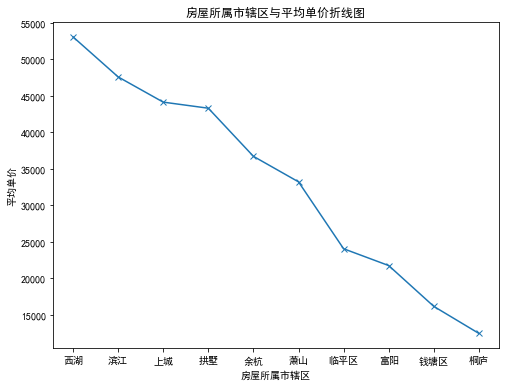

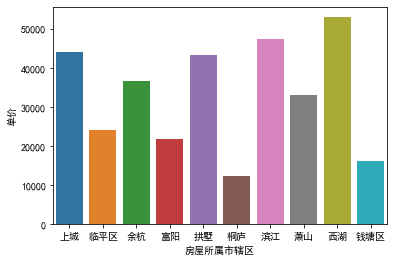

In [28]:
fig = plt.figure(figsize=(8,6))
p1 = fig.add_subplot(1,1,1)
p1.set_title('房屋所属市辖区与平均单价折线图')
p1.set_ylabel('平均单价')
p1.set_xlabel('房屋所属市辖区')
p1.plot(data_mean.index,data_mean['单价'],marker = 'x')
plt.show()
# 房屋所属市辖区价格曲线
area_data = data_nulless.groupby(by=['房屋所属市辖区'])
d = area_data.mean()
bp = sns.barplot(x=d.index,y=d['单价'])

可以看到对于不同的市辖区来说，其房屋平方单价相差较大，在杭州市中，其最高的地区在西湖区，平均房价达到了50000/㎡

### 房屋户型与市辖区的单价分析

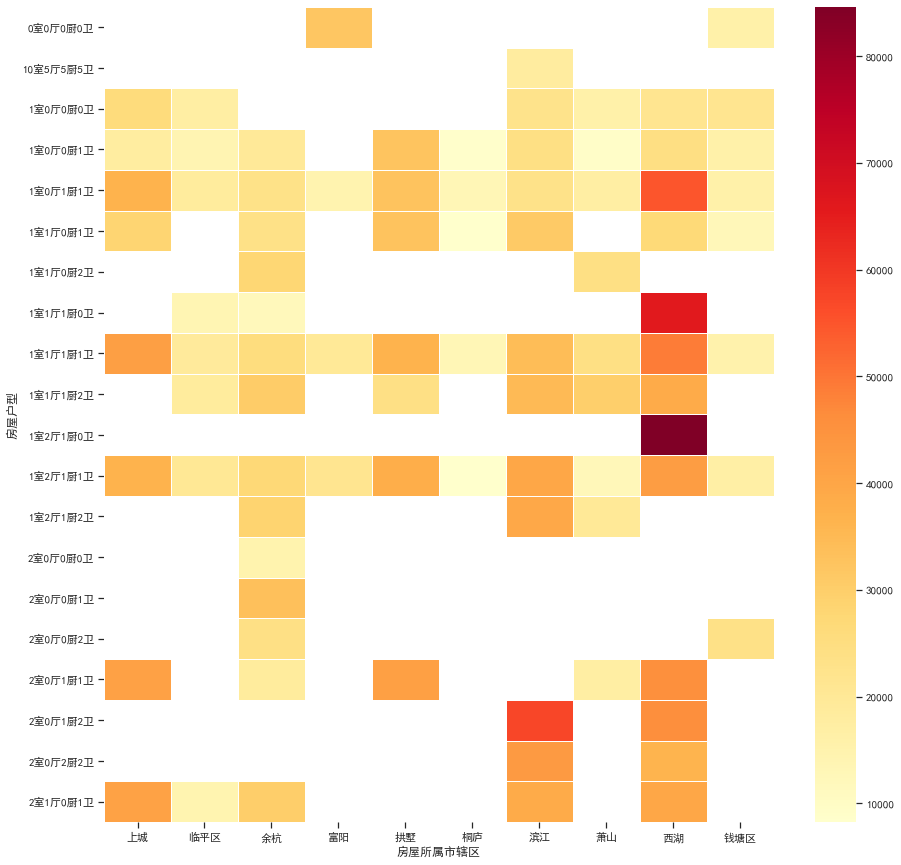

In [29]:
site_bytes_data=None
data_all_pivot = pd.pivot_table(data=data_nulless,index=data_nulless['房屋户型'],columns=data_nulless['房屋所属市辖区'],aggfunc=np.mean)

site_bytes_data = data_all_pivot['单价']
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
fig,ax = plt.subplots(figsize=(15,15))
# sns.set(font_scale=1.25)
x = sns.heatmap(site_bytes_data[:20], # 指定绘图数据
                 cmap=plt.cm.YlOrRd, # 指定填充色
#                 square=True,
                 linewidths=1, # 设置每个单元方块的间隔
                )

## 数据分析

In [30]:
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

## 构建模型并进行预测

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

In [32]:
# 将房屋年限修改为特定的年限，而不是一个日期字符串
def handleHouseingLife(line):
    yearTick = ['满两年','满五年','未满两年']
    cur = line['房屋年限']
    now = datetime.now()
    newLine = line
    if cur not in yearTick:
        cur = datetime.strptime(cur,'%Y-%m-%d')
        year = int((now -cur).days / 365)
        if year < 2:
            newLine['房屋年限'] = '未满两年'
        elif 2 <= year < 5:
            newLine['房屋年限'] = '满两年'
        elif 5 <= year:
            newLine['房屋年限'] = '满五年'
    return newLine

data_nulless = data_nulless.apply(handleHouseingLife,axis=1)
data_nulless['房屋年限'].unique()

array(['满五年', '满两年', '未满两年'], dtype=object)

In [33]:
data_nulless['房屋朝向'].unique()
data_nulless['装修情况'].unique()
temp = data_nulless['配备电梯']=='暂无数据'
list(temp.values).count(True)

732

In [45]:
ohe = pd.get_dummies(data_nulless[['配备电梯','房屋所属市辖区','装修情况','房屋年限']])
full = data_nulless[['总价格','单价','建筑面积']]
full = full.join(ohe)
full.head()

,总价格,单价,建筑面积,配备电梯_无,配备电梯_暂无数据,配备电梯_有,房屋所属市辖区_上城,房屋所属市辖区_临平区,房屋所属市辖区_余杭,房屋所属市辖区_富阳,...,房屋所属市辖区_萧山,房屋所属市辖区_西湖,房屋所属市辖区_钱塘区,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,房屋年限_未满两年,房屋年限_满两年,房屋年限_满五年
0,1200.0,55196,217.41,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,465.0,41224,112.80,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,307.0,33254,92.32,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,505.0,56243,89.79,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,510.0,31893,159.91,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
X = full.iloc[:,1:]
y = full['总价格']
# 将数据划分为训练集、测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
# 建立线性回归模型
clf = LinearRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred[:10]

array([362.24272056, 807.97198212, 258.25018131, 625.01948198,
       522.52824691, 411.13288718, 467.90352058, 443.70806839,
       332.00208604, 230.28203243])

#### 线性回归

In [36]:
y_test.values

array([350., 820., 290., ..., 156., 380., 125.])

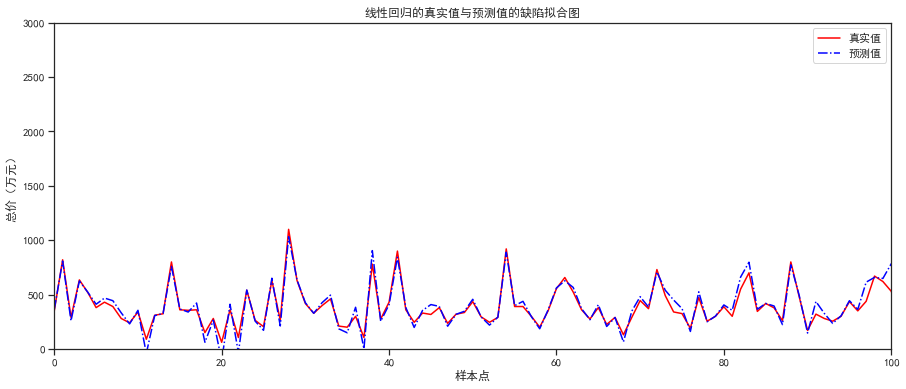

In [44]:
fig = plt.figure(figsize=(15,6))
plt.plot(range(y_test.shape[0]),y_test.values,color='red',linewidth=1.5,linestyle='-')
plt.plot(range(y_test.shape[0]),y_pred,color='blue',linewidth=1.5,linestyle='-.')
plt.xlim((0,100))
plt.ylim((0,3000))
plt.title('线性回归的真实值与预测值的缺陷拟合图')
plt.legend(['真实值','预测值'])
plt.xlabel('样本点')
plt.ylabel('总价（万元）')
plt.show()

#### 选用其他回归模型

In [38]:
size=np.arange(0.6,1,0.1)
scorelist = [[],[],[],[],[],[]]
for i in range(4):
    train_X, test_X, train_y, test_y = train_test_split(X , y,train_size=size[i],random_state=5)

    #随机森林回归
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit( train_X , train_y )
    scorelist[0].append(model.score(test_X , test_y ))

    #支持向量回归
    from sklearn.svm import SVR
    model = SVR()
    model.fit( train_X , train_y )
    scorelist[1].append(model.score(test_X , test_y ))

    #梯度提升回归
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor()
    model.fit( train_X , train_y )
    scorelist[2].append(model.score(test_X , test_y ))

    #KNR最邻近回归算法
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors = 3)
    model.fit( train_X , train_y )
    scorelist[3].append(model.score(test_X , test_y ))

    #回归决策树
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor()
    model.fit( train_X , train_y )
    scorelist[4].append(model.score(test_X , test_y ))
    
    # 建立线性回归模型
    clf = LinearRegression().fit(train_X,train_y)
    scorelist[5].append(clf.score(test_X,test_y))
    

### 模型评估
- 平均绝对误差
- 均方误差
- 中值绝对误差
- 可解释方差值
- R平方值

In [46]:
scorelist

[[0.9970589560520228,
  0.9980457174007665,
  0.9976475802203598,
  0.9964044960299407],
 [0.4353942368612901,
  0.43804199953585293,
  0.44194906068500794,
  0.4491930649545429],
 [0.9957860459599303,
  0.9968263210239848,
  0.9968162712124539,
  0.9968391174609064],
 [0.8574043526439483,
  0.8662819377153539,
  0.8742364737409933,
  0.8868521916717439],
 [0.9944437762516056,
  0.9935391064476292,
  0.9966018489007431,
  0.9931246124927025],
 [0.9117440922440497,
  0.9091614138443307,
  0.9095540723028697,
  0.9072211795059095]]

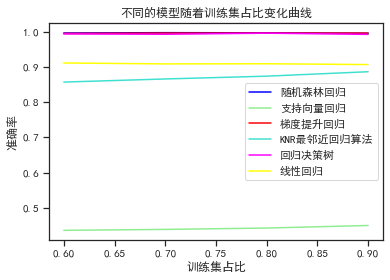

In [40]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
color_list = ('blue', 'lightgreen', 'red', 'turquoise', 'magenta','yellow')
for i in range(0,6):
    plt.plot(size,scorelist[i],color=color_list[i])

    
plt.legend(['随机森林回归', '支持向量回归','梯度提升回归','KNR最邻近回归算法', '回归决策树','线性回归'])
plt.xlabel('训练集占比')
plt.ylabel('准确率')
# plt.ylim((0.4,1.0))
plt.title('不同的模型随着训练集占比变化曲线')
plt.show()

In [41]:
print("线性回归模型的平均绝对误差为：",mean_absolute_error(y_test,y_pred)) # 0
print("线性回归模型的均方误差为：",mean_squared_error(y_test,y_pred)) # 0
print("线性回归模型的中值绝对误差为：",median_absolute_error(y_test,y_pred)) # 0
print("线性回归模型的可解释方差值为：",explained_variance_score(y_test,y_pred)) # 1.0
print("线性回归模型的R平方值为：",r2_score(y_test,y_pred))  # 1.0

线性回归模型的平均绝对误差为： 46.54674435910352
线性回归模型的均方误差为： 6533.38277479152
线性回归模型的中值绝对误差为： 28.13013693317629
线性回归模型的可解释方差值为： 0.9117924411939502
线性回归模型的R平方值为： 0.9117316102038063


**可解释方差与R2值较接近1，所以本次构建的模型是一个较为有效的模型**

In [48]:
#支持向量回归
from sklearn.svm import SVR
model = SVR()
model.fit( X_train , y_train)
svr_pred = model.predict(X_test)

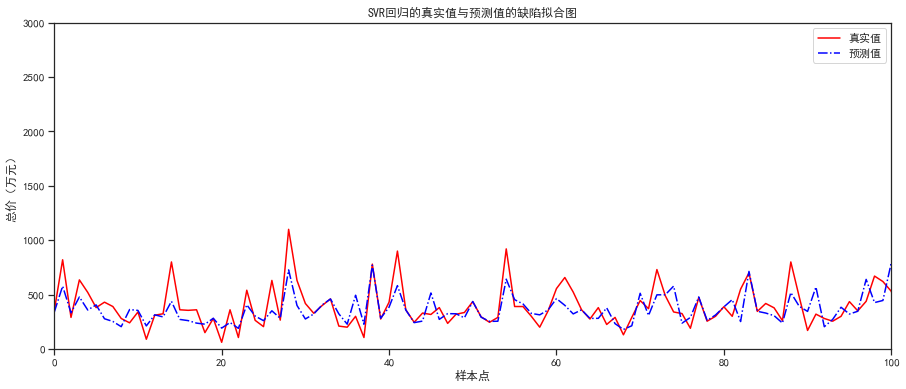

svr回归模型的平均绝对误差为： 115.54337657059394
svr回归模型的均方误差为： 40760.92045459037
svr回归模型的中值绝对误差为： 78.0260633274491
svr回归模型的可解释方差值为： 0.4896845982635525
svr回归模型的R平方值为： 0.4493050630647867


In [50]:
fig = plt.figure(figsize=(15,6))
plt.plot(range(y_test.shape[0]),y_test.values,color='red',linewidth=1.5,linestyle='-')
plt.plot(range(y_test.shape[0]),svr_pred,color='blue',linewidth=1.5,linestyle='-.')
plt.xlim((0,100))
plt.ylim((0,3000))
plt.title('SVR回归的真实值与预测值的缺陷拟合图')
plt.legend(['真实值','预测值'])
plt.xlabel('样本点')
plt.ylabel('总价（万元）')
plt.show()
print("svr回归模型的平均绝对误差为：",mean_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的均方误差为：",mean_squared_error(y_test,svr_pred)) # 0
print("svr回归模型的中值绝对误差为：",median_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的可解释方差值为：",explained_variance_score(y_test,svr_pred)) # 1.0
print("svr回归模型的R平方值为：",r2_score(y_test,svr_pred))  # 1.0

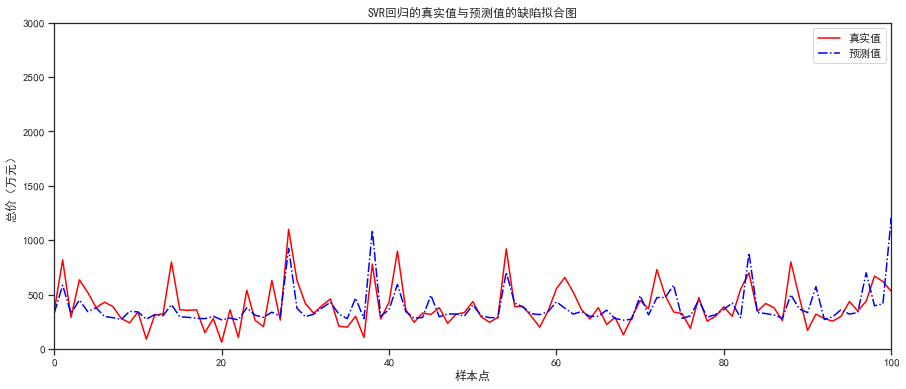

svr回归模型的平均绝对误差为： 123.73510777854851
svr回归模型的均方误差为： 40348.91499959422
svr回归模型的中值绝对误差为： 82.89662873988178
svr回归模型的可解释方差值为： 0.46055354464391307
svr回归模型的R平方值为： 0.45487140738492615


In [51]:
model = SVR(kernel='poly')
model.fit( X_train , y_train)
svr_pred = model.predict(X_test)
fig = plt.figure(figsize=(15,6))
plt.plot(range(y_test.shape[0]),y_test.values,color='red',linewidth=1.5,linestyle='-')
plt.plot(range(y_test.shape[0]),svr_pred,color='blue',linewidth=1.5,linestyle='-.')
plt.xlim((0,100))
plt.ylim((0,3000))
plt.title('SVR回归的真实值与预测值的缺陷拟合图')
plt.legend(['真实值','预测值'])
plt.xlabel('样本点')
plt.ylabel('总价（万元）')
plt.show()
print("svr回归模型的平均绝对误差为：",mean_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的均方误差为：",mean_squared_error(y_test,svr_pred)) # 0
print("svr回归模型的中值绝对误差为：",median_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的可解释方差值为：",explained_variance_score(y_test,svr_pred)) # 1.0
print("svr回归模型的R平方值为：",r2_score(y_test,svr_pred))  # 1.0

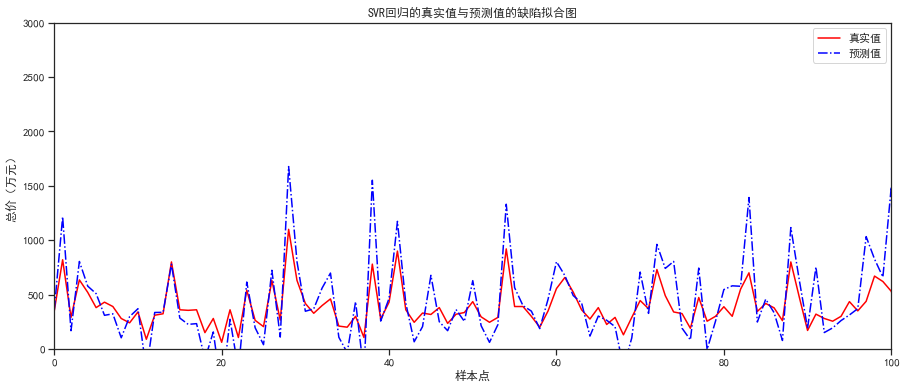

svr回归模型的平均绝对误差为： 185.3328497230616
svr回归模型的均方误差为： 64482.64526192943
svr回归模型的中值绝对误差为： 137.8721677660942
svr回归模型的可解释方差值为： 0.13019498292046172
svr回归模型的R平方值为： 0.12881588860354343


In [53]:
model = SVR(kernel='linear')
model.fit( X_train , y_train)
svr_pred = model.predict(X_test)
fig = plt.figure(figsize=(15,6))
plt.plot(range(y_test.shape[0]),y_test.values,color='red',linewidth=1.5,linestyle='-')
plt.plot(range(y_test.shape[0]),svr_pred,color='blue',linewidth=1.5,linestyle='-.')
plt.xlim((0,100))
plt.ylim((0,3000))
plt.title('SVR回归的真实值与预测值的缺陷拟合图')
plt.legend(['真实值','预测值'])
plt.xlabel('样本点')
plt.ylabel('总价（万元）')
plt.show()
print("svr回归模型的平均绝对误差为：",mean_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的均方误差为：",mean_squared_error(y_test,svr_pred)) # 0
print("svr回归模型的中值绝对误差为：",median_absolute_error(y_test,svr_pred)) # 0
print("svr回归模型的可解释方差值为：",explained_variance_score(y_test,svr_pred)) # 1.0
print("svr回归模型的R平方值为：",r2_score(y_test,svr_pred))  # 1.0